##포아송 회귀

-> 확률분포에 포아송 분포, 링크함수에 로그함수 사용한 일반선형모델

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [3]:
beer=pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


In [4]:
mod_pois=smf.glm("beer_number~temperature",beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Tue, 12 Dec 2023   Deviance:                       5.1373
Time:                        01:31:33   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

-> 기온이 오르면 판매 개수도 증가할 것으로 보임

모델 선택

In [5]:
mod_pois_null=smf.glm("beer_number~1",data=beer, family=sm.families.Poisson()).fit()

In [6]:
print("NULL 모델: ",mod_pois_null.aic.round(3))
print("변수가 있는 모델: ",mod_pois.aic.round(3))

NULL 모델:  223.363
변수가 있는 모델:  119.343


기온 독립변수가 필요하다는 의미

회귀곡선 그래프 (포아송 회귀는 seaborn 함수로 그릴수 없음)

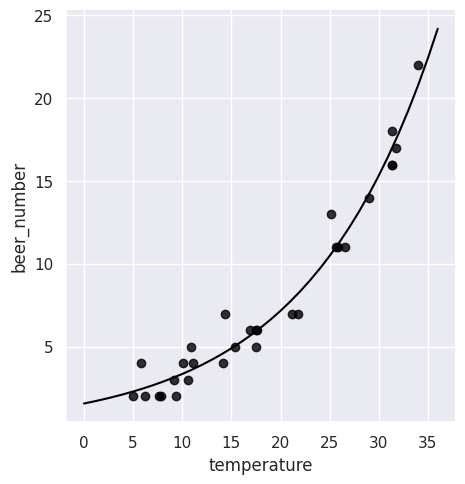

In [7]:
x_plot=np.arange(0,37)
pred=mod_pois.predict(pd.DataFrame({"temperature":x_plot}))

sns.lmplot(y="beer_number",x="temperature", data=beer, fit_reg=False, scatter_kws={"color":"black"})
plt.plot(x_plot, pred, color="black")

회귀계수 해석

링크함수가 로그함수이므로 덧셈이 곱셈이 됨 -> 기온이 1도 오르면 맥주 y"배" 증가

In [8]:
#기온이 1도일 때의 판매 개수의 기댓값
exp_val_1=pd.DataFrame({"temperature":[1]})
pred_1=mod_pois.predict(exp_val_1)
#기온이 2도일 때의 판매 개수의 기댓값
exp_val_2=pd.DataFrame({"temperature":[2]})
pred_2=mod_pois.predict(exp_val_2)

#기온이 1도에서 1도 오르면 판매 개수는 몇배가 되는지
pred_2/pred_1

0    1.079045
dtype: float64

In [9]:
sp.exp(mod_pois.params["temperature"])

1.079045054586893